IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score 

import warnings 
warnings.filterwarnings('ignore')

IMPORT THE DATASET

In [2]:
dataset = pd.read_csv('IMDb Movies.csv',encoding=('ISO-8859-1'))
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [4]:
dataset.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
dataset.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


Data Filtering and Preprocessing

In [7]:
dataset.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [8]:
dataset.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [9]:
dataset.shape

(15509, 10)

In [10]:
dataset['Genre'].unique

<bound method Series.unique of 0                  Drama
1                  Drama
2         Drama, Musical
3        Comedy, Romance
4                  Drama
              ...       
15504             Action
15505      Action, Drama
15506             Action
15507             Action
15508      Action, Drama
Name: Genre, Length: 15509, dtype: object>

In [11]:
print(dataset['Rating'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        NaN
1        7.0
2        NaN
3        4.4
4        NaN
        ... 
15504    4.6
15505    4.5
15506    NaN
15507    NaN
15508    6.2
Name: Rating, Length: 15509, dtype: float64>


In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
attribute = ['Name','Year','Duration','Votes','Rating']
dataset.dropna(subset = attribute,inplace=True)
missing_val = dataset.isna().sum()
print(missing_val)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [14]:
dataset

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [15]:
rating_and_name = dataset[['Name', 'Rating']]
print(rating_and_name)

                                     Name  Rating
1      #Gadhvi (He thought he was Gandhi)     7.0
3                                 #Yaaram     4.4
5                    ...Aur Pyaar Ho Gaya     4.7
6                               ...Yahaan     7.4
8                      ?: A Question Mark     5.6
...                                   ...     ...
15493                              Zubaan     6.1
15494                            Zubeidaa     6.2
15503                     Zulm Ki Zanjeer     5.8
15505                               Zulmi     4.5
15508                        Zulm-O-Sitam     6.2

[5851 rows x 2 columns]


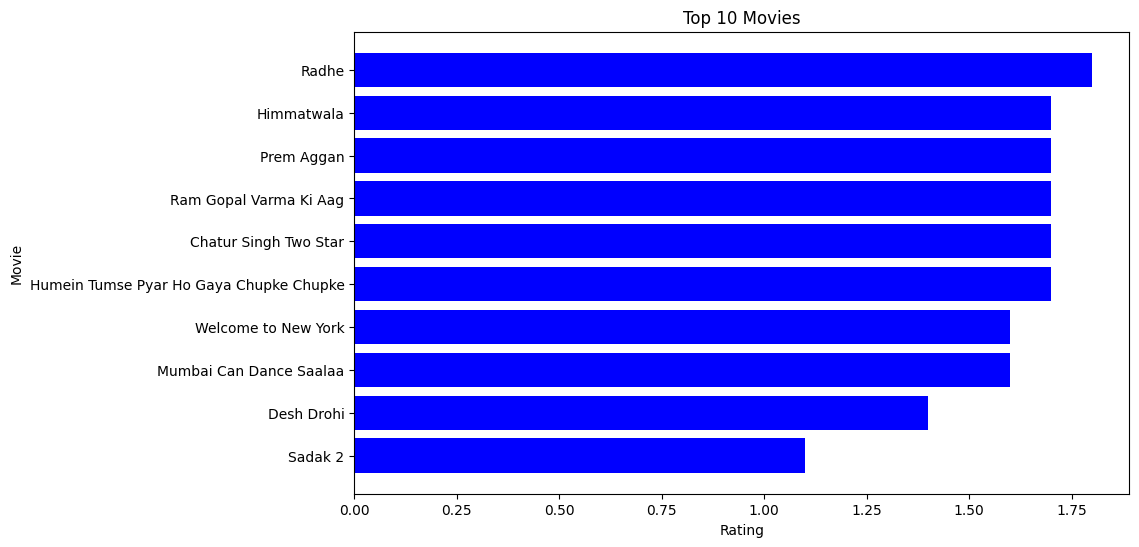

In [16]:
high_rated = dataset.sort_values(by = 'Rating',ascending=True).head(10)
plt.figure(figsize = (10,6))
plt.barh(high_rated['Name'],high_rated['Rating'],color = 'blue')
plt.xlabel('Rating')
plt.title('Top 10 Movies')
plt.ylabel('Movie')
plt.gca().invert_yaxis
plt.show()

SCATTER PLOTTING

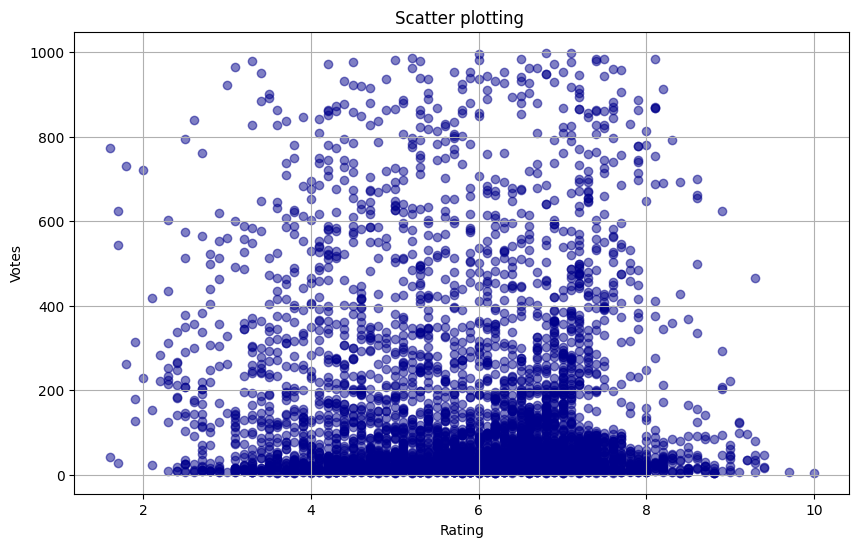

In [17]:
dataset['Votes'] = pd.to_numeric(dataset["Votes"],errors = 'coerce')
plt.figure(figsize = (10,6))
plt.scatter(dataset['Rating'],dataset['Votes'],alpha = 0.5,color = 'darkblue')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title("Scatter plotting ")
plt.grid(True)
plt.show()

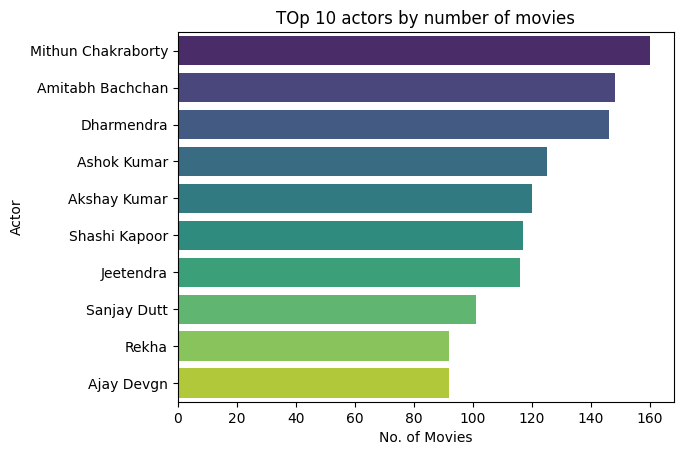

In [18]:
actors = pd.concat([dataset['Actor 1'],dataset['Actor 2'],dataset['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor','Number of Movies']
sns.barplot(x="Number of Movies",y = 'Actor',data= actor_counts.head(10),palette='viridis')
plt.xlabel('No. of Movies')
plt.ylabel('Actor')
plt.title("TOp 10 actors by number of movies")
plt.show()

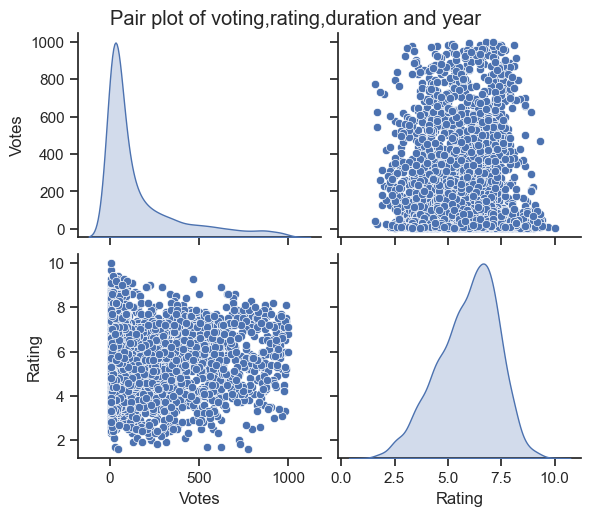

In [19]:
columns_of_interest = ['Votes','Rating','Duration','Year']
sns.set(style='ticks')
sns.pairplot(dataset[columns_of_interest],diag_kind='kde',markers = 'o',palette='viridis',height=2.5,aspect=1.2)
plt.suptitle('Pair plot of voting,rating,duration and year',y = 1.02)
plt.show()

In [20]:
dataset['Duration'] = pd.to_numeric(dataset['Duration'].str.extract('(\d+)')[0])
dataset['Year'] = pd.to_numeric(dataset['Year'].str.extract('(\d+)')[0])

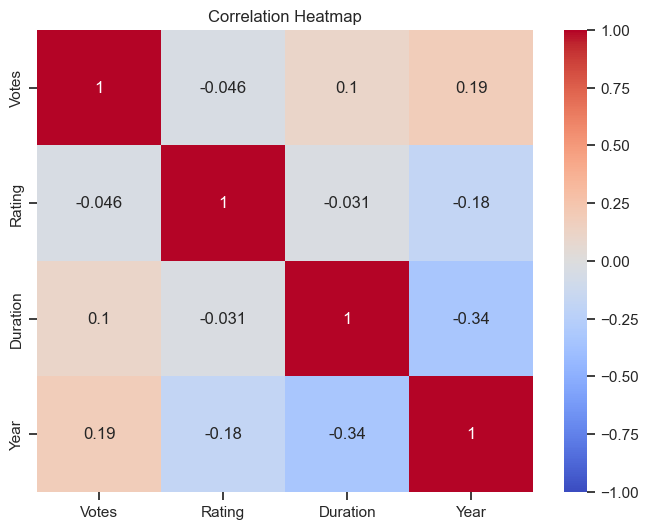

In [21]:
num_columns = ['Votes','Rating','Duration','Year']
correlation_matrix = dataset[num_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot = True,cmap = 'coolwarm',vmin=-1,vmax=1)
plt.title('Correlation Heatmap')
plt.show()

Feature engineering

In [22]:
sorted_dataset = dataset.sort_values(by='Votes',ascending=False)
sorted_dataset['Vote_Count_percentile'] = sorted_dataset['Votes'].rank(pct =True)*100
sorted_dataset.reset_index(drop= True,inplace=True)
print(sorted_dataset[['Name','Votes','Vote_Count_percentile']])

                                      Name  Votes  Vote_Count_percentile
0     Satyam Shivam Sundaram: Love Sublime  999.0             100.000000
1                               Hera Pheri  998.0              99.977689
2                              Kurukshetra  996.0              99.955377
3                              Dishkiyaoon  986.0              99.933066
4                               Kadvi Hawa  985.0              99.899598
...                                    ...    ...                    ...
5846                                 Ziddi    NaN                    NaN
5847                        Zila Ghaziabad    NaN                    NaN
5848                                 Zinda    NaN                    NaN
5849              Zindagi Na Milegi Dobara    NaN                    NaN
5850                              Zubeidaa    NaN                    NaN

[5851 rows x 3 columns]


In [23]:
dataset.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,NaN,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [24]:
dataset = dataset.dropna(subset=['Votes'])
print(dataset)

                                     Name  Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  2019       109   
3                                 #Yaaram  2019       110   
5                    ...Aur Pyaar Ho Gaya  1997       147   
8                      ?: A Question Mark  2012        82   
9                                @Andheri  2014       116   
...                                   ...   ...       ...   
15492                               Zorro  1975       150   
15493                              Zubaan  2015       115   
15503                     Zulm Ki Zanjeer  1989       125   
15505                               Zulmi  1999       129   
15508                        Zulm-O-Sitam  1998       130   

                           Genre  Rating  Votes           Director  \
1                          Drama     7.0    8.0      Gaurav Bakshi   
3                Comedy, Romance     4.4   35.0         Ovais Khan   
5         Comedy, Drama, Musical     4.7  827.0       Rah

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4482 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      4482 non-null   object 
 1   Year      4482 non-null   int64  
 2   Duration  4482 non-null   int64  
 3   Genre     4451 non-null   object 
 4   Rating    4482 non-null   float64
 5   Votes     4482 non-null   float64
 6   Director  4481 non-null   object 
 7   Actor 1   4407 non-null   object 
 8   Actor 2   4365 non-null   object 
 9   Actor 3   4320 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 385.2+ KB


Training the model

In [26]:
dataset['Year'] = dataset['Year'].astype(str)
dataset['Duration'] = dataset['Duration'].astype(str)
dataset['Year'] = dataset['Year'].str.extract('(\d+)').astype(float)
X = dataset[['Year','Duration','Votes']]
Y = dataset['Rating']


In [27]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state=42)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [29]:
Y_pred = regressor.predict(X_test)
Y_pred

array([6.47455333, 5.87626466, 5.98954469, 5.76802222, 5.20665048,
       6.51220115, 5.70760694, 6.28934458, 5.7304802 , 5.98336626,
       6.27372398, 5.69577944, 6.39904415, 5.72308117, 5.74498385,
       6.74160289, 5.9681597 , 6.43042183, 5.07192531, 5.39840646,
       5.698618  , 6.43520362, 5.81649325, 5.55478705, 5.6834762 ,
       5.51672402, 5.45851598, 6.00026574, 5.78690806, 5.43304323,
       5.50875612, 5.72415841, 5.72973789, 5.89947076, 5.74108452,
       5.49333928, 6.15885198, 5.62509146, 5.70655927, 6.01469806,
       5.51831398, 5.30180622, 6.04477599, 5.94216554, 5.73019777,
       6.63832304, 6.23807192, 6.35028087, 5.84431596, 5.97295877,
       5.78264891, 6.07928565, 5.86248565, 5.59223278, 6.19030719,
       5.67262379, 5.82582859, 6.23541091, 5.55389107, 5.2245669 ,
       6.00345351, 6.5819784 , 5.69165759, 5.62587186, 6.31440955,
       6.5370394 , 6.44098558, 5.92750247, 6.18706865, 6.54311729,
       6.39664256, 5.65264646, 6.1017109 , 5.47235603, 5.88909

In [30]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred,squared=False)
r2 = r2_score(Y_test,Y_pred)
print(f"MAE:",mae)
print(f"MsE:",mse)
print(f"R2score:",r2*1000)


MAE: 1.0848311387601355
MsE: 1.3484226346477912
R2score: 98.1216384029091
